# Setting up the environment and importing the data

In [25]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
train_xy = pd.read_csv("DSA4211/train-xy.csv")
test = pd.read_csv("DSA4211/test-x.csv")

In [101]:
train_xy

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-2.836799,-0.358848,0.229182,0.699971,1.336190,0.984788,-0.425239,1.310004,0.215709,-1.389411,...,0.281741,-0.922837,1.053928,-1.051535,-0.056903,0.083066,0.192312,-0.039506,-0.806675,0.047861
1,-6.691350,1.081602,-0.455832,0.492078,1.408173,-0.197963,1.617531,-0.950866,-1.250921,-0.303370,...,2.570875,-1.028607,0.679621,-1.361717,0.144300,1.453990,-0.298901,-1.717027,-0.518633,-0.593781
2,2.211965,-0.959496,-0.430918,0.191239,-0.910758,-0.699870,-1.683374,0.719717,0.534322,0.669822,...,0.055120,-0.344222,0.092876,-0.513097,1.317656,0.138951,-1.900100,1.496698,-0.108403,0.823793
3,-3.404807,0.611808,0.186991,0.490763,0.488140,-0.847026,1.205372,1.462078,-1.410871,-1.152401,...,-0.036887,0.573940,1.462439,-2.483321,-0.173088,0.900508,0.441478,0.461693,0.791968,-0.225677
4,-8.606178,0.716633,-1.377330,-2.589308,0.444174,2.859679,-0.476884,0.558184,-0.476010,-1.181636,...,-1.734769,-0.556033,-1.528430,0.126828,2.164732,0.209919,-0.324924,-0.864985,-0.494360,-1.019706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-7.673689,0.223979,-2.227140,0.629109,0.371306,-0.623456,0.570507,-1.641528,0.345308,-1.138447,...,-1.086697,-0.093600,-0.285808,0.486591,1.565281,-0.500644,-0.758327,0.379794,0.508518,0.558814
996,-13.082628,1.809326,1.459093,0.158428,0.720212,-2.549219,0.050776,-0.569455,0.646585,-0.623185,...,-1.193381,-1.094384,0.141609,0.566846,0.742308,0.088769,-0.773133,-0.219185,-1.311174,1.753055
997,-4.411914,1.386181,-0.346397,1.236157,-0.324641,1.194937,-1.256203,-1.006312,0.356330,0.608835,...,0.207263,-0.422256,0.331662,0.288487,1.912556,-0.507740,0.500480,-0.943728,0.651914,1.540073
998,2.900659,0.811981,1.859064,-0.251681,-0.868155,-1.598939,0.586293,-2.088541,-0.519406,-0.495364,...,0.444277,-0.495758,-1.964753,0.734672,-0.146166,-0.052333,0.587487,-0.343477,-0.213943,0.182537


In [102]:
test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-0.244991,0.892978,0.572407,0.132279,0.846642,0.096176,0.892746,0.924040,-0.434594,-1.144520,...,0.906264,1.901898,0.451177,0.292590,0.629340,-0.222918,0.246944,0.344474,0.135516,0.738561
1,-1.616918,-1.113591,-1.202111,0.427342,1.022719,-1.012529,-1.518107,2.199862,0.327463,-1.338159,...,-1.578023,0.824843,-0.478459,1.914525,-0.487439,1.386022,-0.212164,0.221503,0.036357,0.511010
2,-2.261368,0.690216,-1.228782,-0.279688,0.832744,0.103335,-0.074730,0.616347,-0.085210,0.176623,...,-0.227196,1.933549,0.424807,-0.351631,-1.532469,-2.051089,1.021578,1.738350,-0.986476,-0.678784
3,1.370109,-0.121966,0.911579,-1.684504,0.243944,0.004523,-0.690897,-0.584691,2.780507,1.696416,...,0.197386,1.596440,-0.143426,1.838676,-0.090792,0.501838,0.720952,-0.822403,-0.787266,-0.553230
4,1.983610,0.037572,0.573795,-0.078239,1.561335,-0.276647,-0.741170,0.970027,0.124756,0.855003,...,1.380206,-1.856744,0.403040,0.251322,-0.587490,-1.399546,0.589233,-0.675056,-0.308820,0.742988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.819463,-0.132225,1.987259,1.482543,-0.153700,-1.182747,1.134379,1.433691,-1.750373,1.535513,...,2.253787,0.127843,1.099243,-0.027314,0.508060,-0.291674,0.142223,0.334328,0.195834,0.886085
9996,-1.441815,-0.520422,-1.338284,-0.720087,1.778857,0.042734,0.269349,-1.718217,1.115974,-0.617458,...,-0.147480,-1.023812,-0.233869,-0.013129,0.047350,-0.261349,0.963827,-1.238524,-1.672828,-0.074160
9997,0.079223,0.988820,0.407241,-0.142056,-0.633980,0.800763,-0.535756,1.134397,-1.387698,0.321071,...,-0.881513,0.323094,-0.653722,0.269482,-0.038042,-0.617090,-0.236006,0.230748,-0.501167,-0.072894
9998,-0.768939,-0.921212,-0.260985,-0.102339,1.568072,0.084913,0.980283,0.481204,0.823396,0.033000,...,-0.475284,-0.556861,1.729765,0.096702,1.169640,0.388464,-1.440724,-2.590144,1.665079,-0.352464


# Data Cleaning

X30 and X40 are highly correlated, so I will drop the latter.

X55 contains mostly NAs and shall be dropped.

In [5]:
train_xy1 = train_xy.drop(['X40','X55'],axis = 1)

# Splitting the data into training and validation set

In [6]:
X = train_xy1.iloc[:,1:100]
y = train_xy.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Building the Neural Network Model

Each of the 98 variables shall be an input node.

Based on previous models (not in this notebook), data is not linearly seperable, hence a hidden layer will be added.

This hidden layer will contain 49 neurons, obtained by taking the mean of the number of input and output neurons.

Since this is a regression problem, ReLU activation function and Mean Squared Error loss is used.

In [8]:
def build_model(): 
    model = Sequential()
    model.add(Dense(98, input_dim=98, kernel_initializer='normal', activation='relu'))
    model.add(Dense(49, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(X_train, y_train)
training_prediction = estimator.predict(X_train)
training_prediction

# Checking initial model performance

In [15]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)

In [16]:
rsq

0.9965658536562861

Training R-squared of 0.997 looks very good. How about on the validation set?

In [20]:
validation_prediction = estimator.predict(X_test)
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)

In [21]:
rsq

0.4680385401096595

Major drop in R-squared, indicating serious overfitting. 

I will edit the model by removing the hidden layer, which may be a source of overfitting.

# Adjusted Neural Network

In [64]:
def build_model2(): 
    model = Sequential()
    model.add(Dense(98, input_dim=98, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(49, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [65]:
estimator = KerasRegressor(build_fn=build_model2, epochs=100, batch_size=5, verbose=0)
estimator.fit(X_train, y_train)
training_prediction = estimator.predict(X_train)
validation_prediction = estimator.predict(X_test)

In [66]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)
print('The training R-squared is :', rsq)

The training R-squared is : 0.9962254827554976


In [67]:
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)
print('The validation R-squared is :', rsq)

The validation R-squared is : 0.5079300946329504


# Regularized and Adjusted Neural Network

Let's see if adding drop out will help.

In [111]:
def build_model3(): 
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(98,)))
    model.add(Dense(98, input_dim=98, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(49, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [112]:
estimator = KerasRegressor(build_fn=build_model2, epochs=100, batch_size=5, verbose=0)
estimator.fit(X_train, y_train)
training_prediction = estimator.predict(X_train)
validation_prediction = estimator.predict(X_test)

In [113]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)
print('The training R-squared is :', rsq)

The training R-squared is : 0.9947759623057474


In [114]:
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)
print('The validation R-squared is :', rsq)

The validation R-squared is : 0.4858238887488415


Validation R-squared still very low for both. Perhaps a simpler model should be used.

# Lasso

In [78]:
from sklearn.linear_model import LassoCV

10-fold cross validation

In [79]:
reg = LassoCV(cv=10, normalize=False).fit(X_train, y_train)
training_prediction = reg.predict(X_train)
validation_prediction = reg.predict(X_test)

In [80]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)
print('The training R-squared is :', rsq)

The training R-squared is : 0.6315625160196948


In [81]:
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)
print('The validation R-squared is :', rsq)

The validation R-squared is : 0.5761903999867041


Even though training R-squared here is much lower, the Lasso model performs better on the validation set

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

Start with a max depth of 20, which is arbitrary.

In [121]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)
training_prediction = regr.predict(X_train)
validation_prediction = regr.predict(X_test)

In [122]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)
print('The training R-squared is :', rsq)

The training R-squared is : 0.9326960383177906


In [123]:
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)
print('The validation R-squared is :', rsq)

The validation R-squared is : 0.5081193374782587


Performance is similar to that of Neural Network's. Let's check which value of max depth returns the lowest validation R-squared value

In [88]:
training_array = []
validation_array = []
for i in range(1,20):
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train, y_train)
    training_prediction = regr.predict(X_train)
    validation_prediction = regr.predict(X_test)
    
    rss = sum((training_prediction-y_train)**2)
    tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
    rsq = 1 - (rss/tss)
    training_array.append(rsq)
    
    rss = sum((validation_prediction-y_test)**2)
    tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
    rsq = 1 - (rss/tss)
    validation_array.append(rsq)

In [93]:
import matplotlib.pyplot as plt

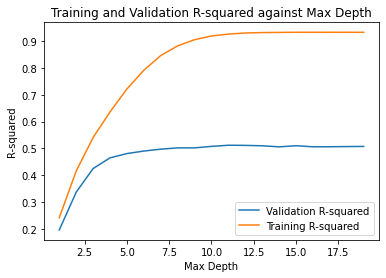

In [124]:
plt.plot(range(1,20), validation_array, label = 'Validation R-squared')
plt.plot(range(1,20), training_array, label = 'Training R-squared')
plt.title('Training and Validation R-squared against Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

Once the max depth hits 10, validation R-squared is pretty much constant. Thus I will check what's the exact R-squared value for a Random Forest with max depth of 10.

In [118]:
regr2 = RandomForestRegressor(max_depth=10, random_state=0)
regr2.fit(X_train, y_train)
training_prediction = regr2.predict(X_train)
validation_prediction = regr2.predict(X_test)

In [119]:
rss = sum((training_prediction-y_train)**2)
tss = sum((y_train - (sum(y_train)/len(y_train)))**2)
rsq = 1 - (rss/tss)
print('The training R-squared is :', rsq)

The training R-squared is : 0.9191561864229907


In [120]:
rss = sum((validation_prediction-y_test)**2)
tss = sum((y_test - (sum(y_test)/len(y_test)))**2)
rsq = 1 - (rss/tss)
print('The validation R-squared is :', rsq)

The validation R-squared is : 0.5071896303474293


Validation R-squared is almost the same as that of max depth 20, but training R-squared has reduced.

# Running the chosen model on the test set for my final predictions

Since the model will be assessed using a test set with no response, choosing the model with the highest validation, not training, R-squared should be the way to go.

Based on the 3 above models, Lasso had the highest validation R-squared. 


In [106]:
final_preds = pd.DataFrame(reg.predict(test.drop(['X40','X55'],axis = 1)))

In [107]:
final_preds.columns = ['Y']
final_preds

,Y
0,-2.218286
1,0.075417
2,1.876225
3,10.984139
4,8.148008
...,...
9995,6.639682
9996,-2.066169
9997,-0.011487
9998,5.032062


In [110]:
path = '/Users/jasinchow/Downloads/A0204765A.csv'
final_preds.to_csv(path, index = False)